<a href="https://colab.research.google.com/github/Jeongmin0658/kentech_tutorial/blob/main/Monte%20Carlo%20simulation/2023_summer_CCP/contributors/Minyong/2_solving%20equations%20share%20eee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part II. Solving equations

# 1 - Solving a quadratic equation with discriminant

In [1]:
import cmath # Complex math module

def solve_quadratic(a, b, c):
    # Here you define the discriminant, D
    D = b**2-4*a*c

    # calculate two solutions
    sol1 = (-b - cmath.sqrt(D)) / (2 * a)
    sol2 = (-b + cmath.sqrt(D)) / (2 * a)

    return sol1, sol2

# Test the function
# Feed your numbers a,b,c
a = 1
b = 3
c = 2

sol1, sol2 = solve_quadratic(a, b, c)

print(f"The solutions are {sol1} and {sol2}")


The solutions are (-2+0j) and (-1+0j)


# 2 - Checking if there is a real solution: Use if statement

In [5]:
import cmath

def solve_quadratic(a, b, c):
    # Calculate the discriminant
    D = b**2 - 4*a*c
    sol1= (-b+cmath.sqrt(D))/(2*a)
    sol2= (-b-cmath.sqrt(D))/(2*a)
    if D>0 :
      num_solutions=2
    elif D==0 :
      num_solutions=1
    else :
      num_solutions=0
    return num_solutions, sol1, sol2
    # Determine the number and type of solutions based on the discriminant
    # Return number of real solutions, and two solutions

# Test the function
a = 1
b = 1
c = 2

#
num_solutions, sol1, sol2 = solve_quadratic(a, b, c)

print(f"There are {num_solutions} real solution(s).")
if num_solutions == 2:
    print(f"The solutions are {sol1} and {sol2}.")
elif num_solutions == 1:
    print(f"The solution is {sol1}.")
else:
    print(f"There are no real solutions, but two complex solutions: {sol1} and {sol2}.")


There are 0 real solution(s).
There are no real solutions, but two complex solutions: (-0.5+1.3228756555322954j) and (-0.5-1.3228756555322954j).


# Now move on to Numerical solver
# 3 - Newton's method


Found solution after 11 iterations.
Root is at: 0.999755859375
f(root)= 5.960464477539063e-08


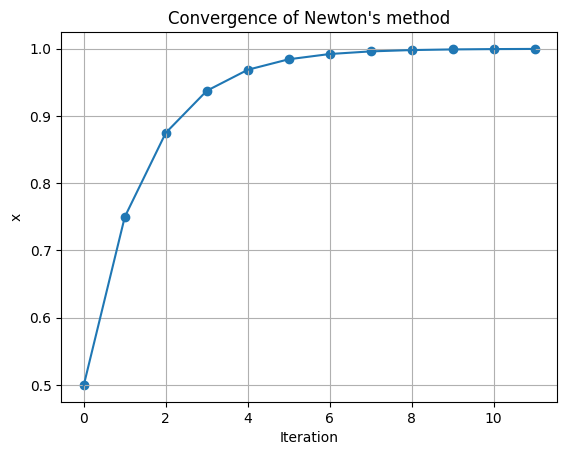

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return a*x**2 + b*x + c

def df(x):
    return 2*a*x + b

def newton_method(x0, f, df, epsilon=1e-7, max_iter=1000):
    """
    Function to apply Newton's method for solving equation f(x)=0.

    Parameters:
    x0 - initial guess
    f - function
    df - derivative of the function
    epsilon - stopping criteria is abs(f(x)) < epsilon
    max_iter - maximum number of iterations
    """

    xn = x0
    x_steps = [x0]
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn, x_steps
        dfxn = df(xn)
        if dfxn == 0:
            print('Zero derivative. No solution found.')
            return None, None
        xn = xn - fxn/dfxn
        x_steps.append(xn)
    print('Exceeded maximum iterations. No solution found.')
    return None, None

# coefficients of the quadratic equation
a = 1
b = -2
c = 1

# Initial guess
x0 = 0.5

# Call the function
root, steps = newton_method(x0, f, df)
# Plot solution versus iteration
# Title: "Convergence of Newton's method"
# xlabel: Iteration
# ylabel: x
# Data plot with line and mark
if root is not None:
  print("Root is at:", root)
  print("f(root)=", f(root))
else:
  print("No root found")

fig, ax= plt.subplots()
x=np.arange(0,len(steps))

ax.plot(x,steps)
ax.scatter(x,steps)
ax.grid()

ax.set_xlabel('Iteration')
ax.set_ylabel('x')
ax.set_title("Convergence of Newton's method")
plt.show()